In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from methods_time_integrals import find_Cdnod, plot_integrals, find_Rnod

In [2]:
# Define the data path where datasets are stored
datapath = "data/"

# Define the drag coefficient
dt = 60*60*24

H = 3114
rho = 1025
Cd = 0.003

# Define the filenames for the datasets (these should be updated with the correct file paths)
A4_file = "A4/A4_lofoten_h_50km_timeseries.nc" 
L800_file = "lofoten800/lofoten800_lofoten_h_50km_timeseries.nc" 

# Load the datasets using xarray
ts_A4 = xr.open_dataset(datapath + A4_file)
ts_L800 = xr.open_dataset(datapath + L800_file).sel(ocean_time=slice("01.01.1997", None))

# Adjusting surface stress
ts_A4["taucirc_area"] = ts_A4.taucirc_area/(H*rho)
ts_A4["taucirc_line"] = ts_A4.taucirc_line/(H*rho)

# Combining the two vorticity terms
ts_L800["zflux_area"] = ts_L800.zbarflux_area + ts_L800.znodflux_area
ts_L800["zflux_line"] = ts_L800.zbarflux_line + ts_L800.znodflux_line

# Interpolating missing values TODO : fill in data gaps
ts_L800["ucirc_area"] = ts_L800["ucirc_area"].interpolate_na(dim="ocean_time", method="linear")
ts_L800["ub2circ_area"] = ts_L800["ub2circ_area"].interpolate_na(dim="ocean_time", method="linear")

sns.set_theme("notebook")

In [ ]:
# Calculate the corrected drag coefficient (Cdnod) for each dataset
Rnod_A4 = find_Rnod(ts_A4, Cd)
Rnod_L800 = find_Rnod(ts_L800, Cd)

# calculate mean corrected drag coefficient
Rnod_A4_mean = np.nanmean(Rnod_A4)
Rnod_L800_mean = np.nanmean(Rnod_L800)

fig, ax = plt.subplots(figsize=(10,8))

# Plot the Cdnod for both datasets
ax.plot(Rnod_A4, label=f'Arctic4, mean = {Rnod_A4_mean:.4f}', color="darkorange")
ax.plot(Rnod_L800, label=f'Lofoten800, mean = {Rnod_L800_mean:.4f}', color="cornflowerblue")

# Add a horizontal line to represent the mean values
ax.axhline(Rnod_A4_mean, color="darkorange")
ax.axhline(Rnod_L800_mean, color="cornflowerblue")


# Add labels and a legend for better clarity
ax.set_xlabel('Time index')
ax.set_ylabel('Adjusted R [m s-1]')
ax.legend()

fig.savefig("figures/adjustedR.pdf")
fig.savefig("figures/adjustedR.png")

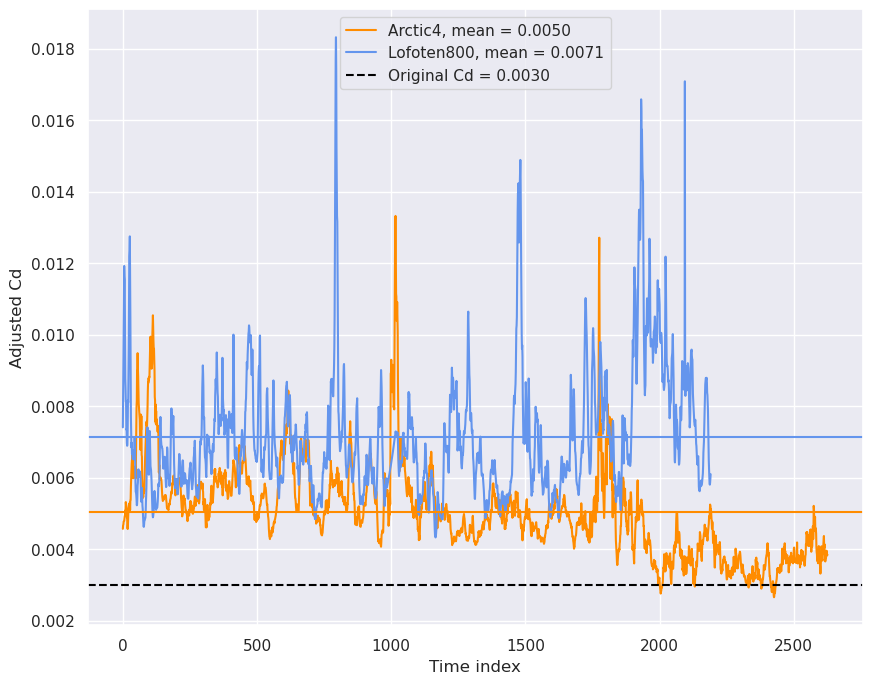

In [3]:
# Calculate the corrected drag coefficient (Cdnod) for each dataset
Cdnod_A4 = find_Cdnod(ts_A4, Cd)
Cdnod_L800 = find_Cdnod(ts_L800, Cd)

# calculate mean corrected drag coefficient
Cdnod_A4_mean = np.nanmean(Cdnod_A4)
Cdnod_L800_mean = np.nanmean(Cdnod_L800)

fig, ax = plt.subplots(figsize=(10,8))

# Plot the Cdnod for both datasets
ax.plot(Cdnod_A4, label=f'Arctic4, mean = {Cdnod_A4_mean:.4f}', color="darkorange")
ax.plot(Cdnod_L800, label=f'Lofoten800, mean = {Cdnod_L800_mean:.4f}', color="cornflowerblue")

# Add a horizontal line to represent the mean values
ax.axhline(Cdnod_A4_mean, color="darkorange")
ax.axhline(Cdnod_L800_mean, color="cornflowerblue")


# Add a horizontal line to represent the original drag coefficient Cd
ax.axhline(Cd, color='black', ls="--", label=f'Original Cd = {Cd:.4f}')

# Add labels and a legend for better clarity
ax.set_xlabel('Time index')
ax.set_ylabel('Adjusted Cd')
ax.legend()

fig.savefig("figures/adjustedCd.pdf")
fig.savefig("figures/adjustedCd.png")

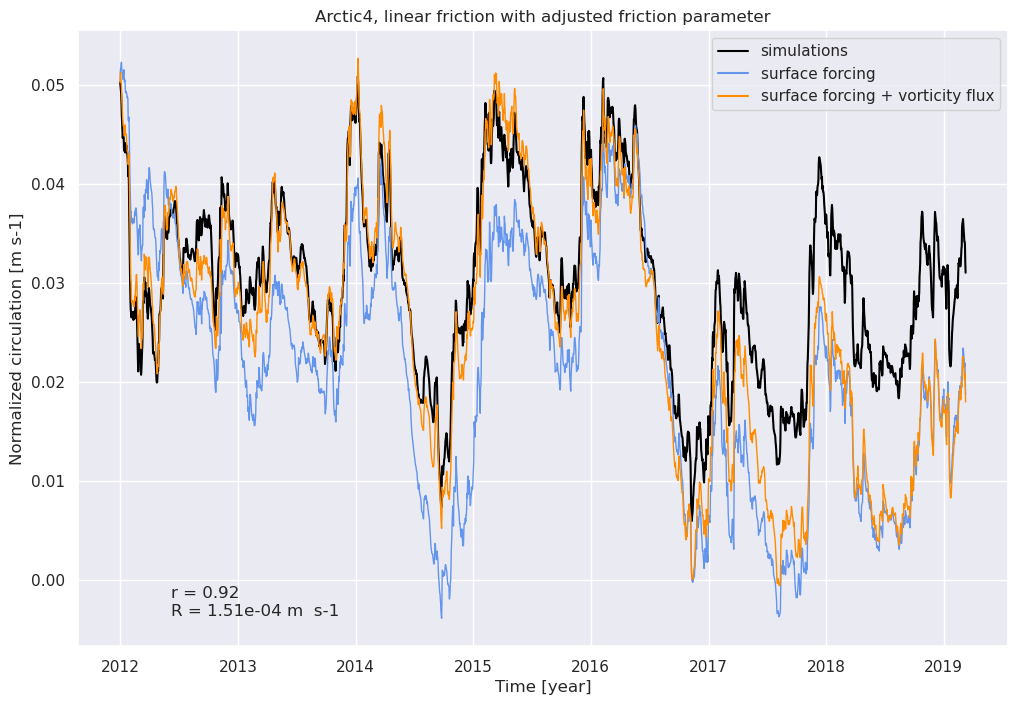

In [9]:
R = 2e-4
figA4, axA4, infoA4 = plot_integrals(ts_A4, friction="linear", 
                             #R=R
                             adjustR=True,
                             )
#axA4.set_title(f"Arctic4, linear friction R = {R:.1e}") 
axA4.set_title(f"Arctic4, linear friction with adjusted friction parameter")

r = infoA4["r"]
R = infoA4["Rnod"]
axA4.text(0.1, 0.05, f"r = {r:.2f}\nR = {R:.2e} m  s-1", transform=axA4.transAxes)

figA4.savefig("figures/A4_time_integral_adjusted_R.pdf")
figA4.savefig("figures/A4_time_integral_adjusted_R.png")

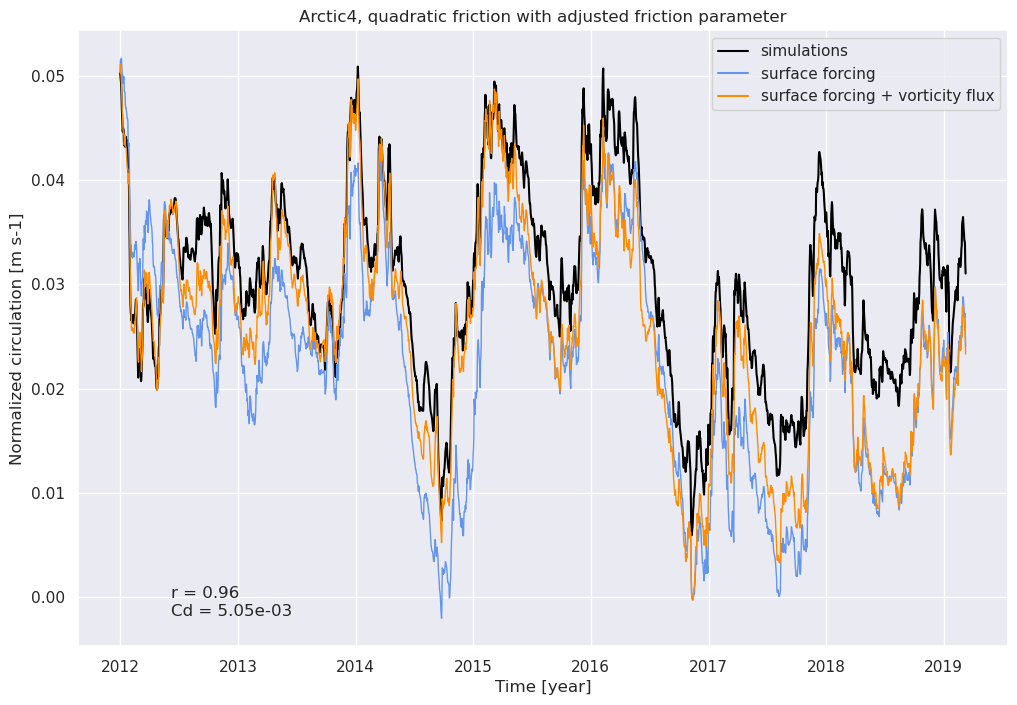

In [5]:
#figAf, axA4 = plot_integrals(ts_A4, friction="linear", R=5e-4);
figA4, axA4, infoA4 = plot_integrals(ts_A4, friction="quadratic", 
                             #adjustDc = False,
                             #dynamicDc=True,
                             )
axA4.set_title("Arctic4, quadratic friction with adjusted friction parameter")

r = infoA4["r"]
Cd = infoA4["Cdnod"]
axA4.text(0.1, 0.05, f"r = {r:.2f}\nCd = {Cd:.2e}", transform=axA4.transAxes)

figA4.savefig("figures/A4_time_integral_adjusted_Cd.pdf")
figA4.savefig("figures/A4_time_integral_adjusted_Cd.png")

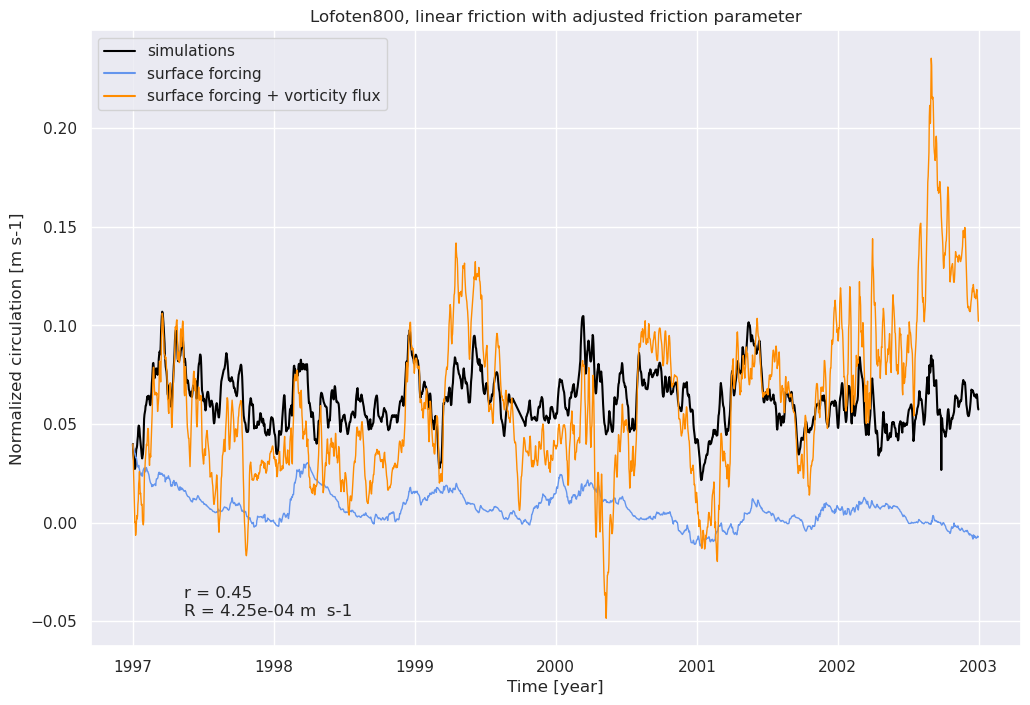

In [8]:
R = 10.6e-4
figL800, axL800, infoL800 = plot_integrals(ts_L800, friction="linear", 
                                 #R=R,
                                 adjustR=True,
                                 )
#axL800.set_title(f"Lofoten800, linear friction R = {R:.2e}")
axL800.set_title(f"Lofoten800, linear friction with adjusted friction parameter")

r = infoL800["r"]
R = infoL800["Rnod"]
axL800.text(0.1, 0.05, f"r = {r:.2f}\nR = {R:.2e} m  s-1", transform=axL800.transAxes)

figL800.savefig("figures/L800_time_integral_adjusted_R.pdf")
figL800.savefig("figures/L800_time_integral_adjusted_R.png")

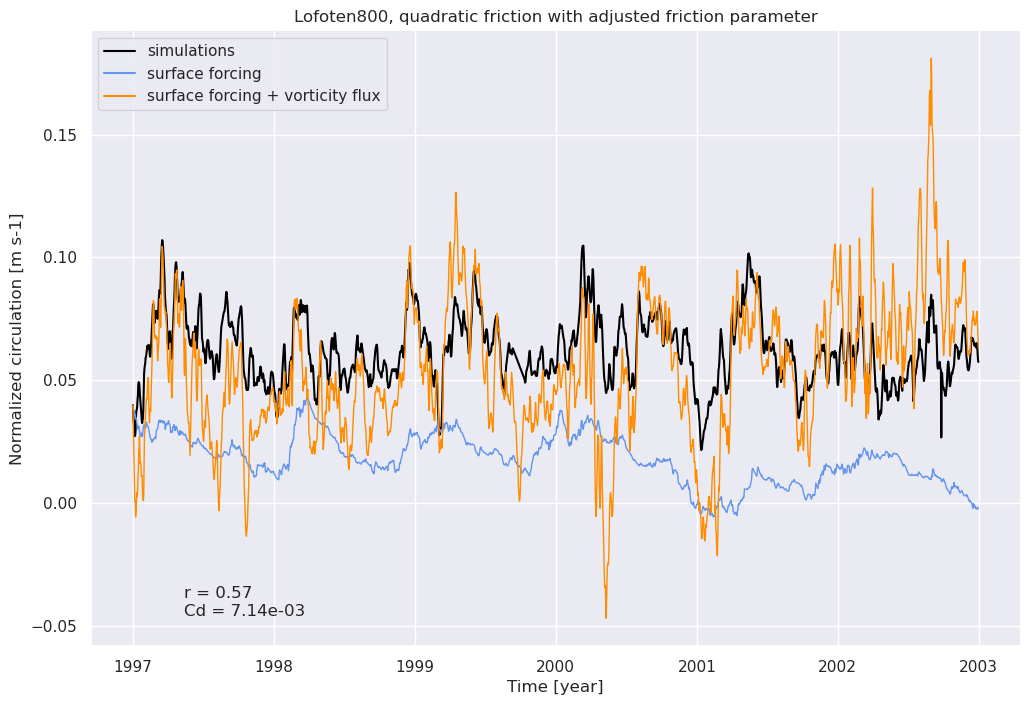

In [7]:
#figAf, axA4 = plot_integrals(ts_A4, friciton="linear", R=5e-4);
figL800, axL800, infoL800 = plot_integrals(ts_L800, friction="quadratic",
                                 #adjustDc = False,
                                 #dynamicDc=True
                                 )
axL800.set_title("Lofoten800, quadratic friction with adjusted friction parameter")

r = infoL800["r"]
Cd = infoL800["Cdnod"]
axL800.text(0.1, 0.05, f"r = {r:.2f}\nCd = {Cd:.2e}", transform=axL800.transAxes)

figL800.savefig("figures/L800_time_integral_adjusted_Cd.pdf")
figL800.savefig("figures/L800_time_integral_adjusted_Cd.png")